In [2]:
!pip install imutils


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from matplotlib import pyplot as plt
import numpy as np

In [243]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 1, 0): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

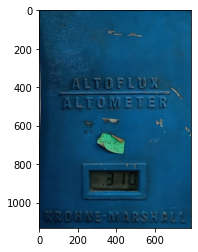

In [244]:
orig_image=cv2.imread("../data/lab_image.jpg")

orig_image=cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
plt.imshow(orig_image)

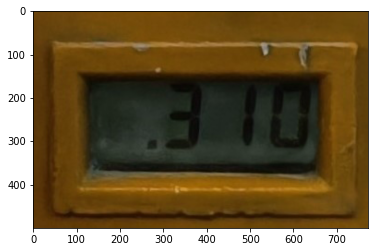

In [245]:
# load the example image
# image = cv2.imread("lab_img_num.jpg")
image = cv2.imread("num.jpg")
# pre-process the image by resizing it
image = imutils.resize(image, height=500)
plt.imshow(image)

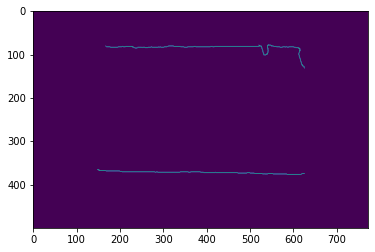

In [246]:
# converting it to graycale, blurring it, and computing an edge map
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)
plt.imshow(edged)

In [247]:
# # find contours in the edge map, then sort them by their
# # size in descending order
# cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
# 	cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
# displayCnt = None
# # loop over the contours
# for c in cnts:
# 	# approximate the contour
# 	peri = cv2.arcLength(c, True)
# 	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
# 	# if the contour has four vertices, then we have found
# 	# the thermostat display
# 	if len(approx) == 4:
# 		displayCnt = approx
# 		break

In [248]:
# # extract the thermostat display, apply a perspective transform
# # to it
# warped = four_point_transform(gray, displayCnt.reshape(4, 2))
# output = four_point_transform(image, displayCnt.reshape(4, 2))

# displayCnt

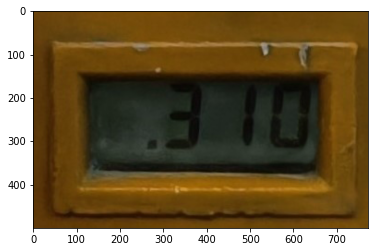

In [249]:
plt.imshow(image)

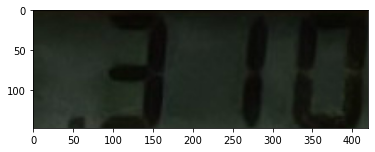

In [253]:

displayCnt=np.array([[220, 162],
       [220, 310],
       [640, 310],
       [640, 162]])
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))
plt.imshow(output)

In [251]:
# src = None
# erosion_size = 0
# max_elem = 2
# max_kernel_size = 21
# title_trackbar_element_shape = 'Element:\n 0: Rect \n 1: Cross \n 2: Ellipse'
# title_trackbar_kernel_size = 'Kernel size:\n 2n +1'
# title_erosion_window = 'Erosion Demo'
# title_dilation_window = 'Dilation Demo'


# erosion_size = cv2.getTrackbarPos(title_trackbar_kernel_size, title_erosion_window)
# erosion_shape = morph_shape(cv2.getTrackbarPos(title_trackbar_element_shape, title_erosion_window))

# element = cv2.getStructuringElement(erosion_shape, (2 * erosion_size + 1, 2 * erosion_size + 1),
#                                    (erosion_size, erosion_size))

# erosion_dst = cv2.erode(src, element)
# cv2.imshow(title_erosion_window, erosion_dst)


# def erosion(val):
#     erosion_size = cv2.getTrackbarPos(title_trackbar_kernel_size, title_erosion_window)
#     erosion_shape = morph_shape(cv2.getTrackbarPos(title_trackbar_element_shape, title_erosion_window))

#     element = cv2.getStructuringElement(erosion_shape, (2 * erosion_size + 1, 2 * erosion_size + 1),
#                                        (erosion_size, erosion_size))
    
#     erosion_dst = cv2.erode(src, element)
#     cv2.imshow(title_erosion_window, erosion_dst)

# def dilatation(val):
#     dilatation_size = cv2.getTrackbarPos(title_trackbar_kernel_size, title_dilation_window)
#     dilation_shape = morph_shape(cv2.getTrackbarPos(title_trackbar_element_shape, title_dilation_window))
#     element = cv2.getStructuringElement(dilation_shape, (2 * dilatation_size + 1, 2 * dilatation_size + 1),
#                                        (dilatation_size, dilatation_size))
#     dilatation_dst = cv2.dilate(src, element)
#     cv2.imshow(title_dilation_window, dilatation_dst)


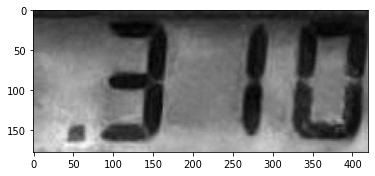

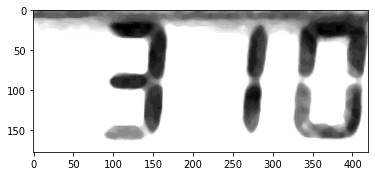

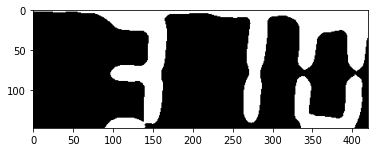

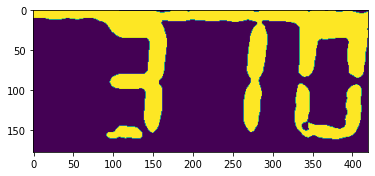

In [252]:
# img = cv2.imread(img_path)
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower_gray = np.array([0, 5, 50], np.uint8)
# upper_gray = np.array([179, 50, 255], np.uint8)
# mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)
# img_res = cv2.bitwise_and(img, img, mask = mask_gray)
gray = warped
plt.imshow(gray, cmap="gray")
plt.show()

median = cv2.medianBlur(warped, 3)
# plt.imshow(output)
adjusted = cv2.convertScaleAbs(gray, alpha=9, beta=20)
median = cv2.medianBlur(adjusted, 9)
plt.imshow(median, cmap="gray")
plt.show()

thresh_with_grey = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap="gray")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
thresh_with_grey = cv2.morphologyEx(thresh_with_grey, cv2.MORPH_OPEN, kernel)
plt.imshow(thresh_with_grey)
plt.show()

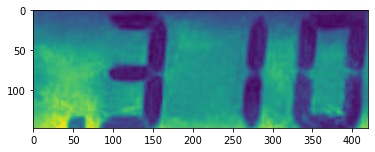

In [181]:
plt.imshow(warped)

In [128]:
# borderoutput = cv2.copyMakeBorder(output, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255, 255, 255])
# plt.imshow(borderoutput)

In [129]:
# borderoutput_gray = cv2.copyMakeBorder(warped, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[41, 50, 40])
# plt.imshow(borderoutput_gray)
# warped=borderoutput_gray

In [205]:
# threshold the warped image, then apply a series of morphological
# operations to cleanup the thresholded image
thresh = cv2.threshold(warped, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

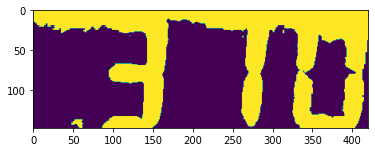

In [206]:
plt.imshow(thresh)

(92, 135)
(138, 148)


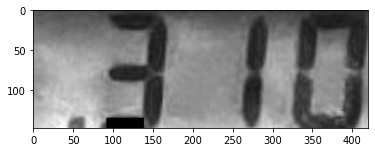

(328, 84)
(412, 148)


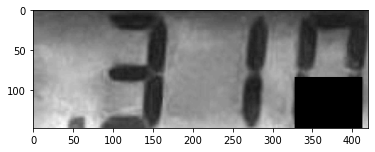

(81, 0)
(420, 141)


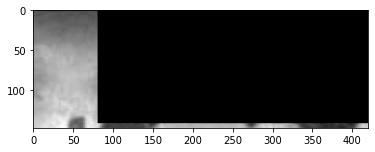

(52, 0)
(55, 1)


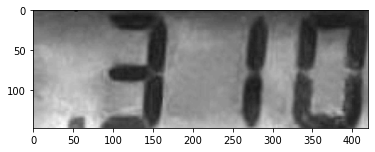

(23, 0)
(34, 2)


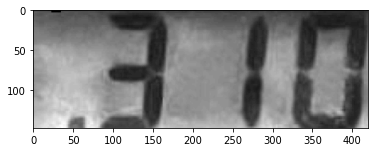

In [212]:
# find contours in the thresholded image, then initialize the
# digit contours lists
# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
# #     cv2.CHAIN_APPROX_SIMPLE)
cnts = cv2.findContours(thresh_with_grey.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
# print(cnts)
# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
#     print(x, y)
    start_point=(x, y)
    end_point=(x+w, y+h)
    print(start_point)
    print(end_point)
    color = (0, 0, 0)
    thickness = -1
    img1 = cv2.rectangle(warped.copy(), start_point, end_point, color, thickness)
    plt.imshow(img1,  cmap='gray')
    plt.show()
#     # if the contour is sufficiently large, it must be a digit
#     if w >= 15 and (h >= 30 and h <= 40):
#         print("found a bounding box")
#         digitCnts.append(c)

(0, 0)
(420, 148)


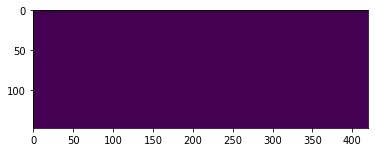

In [204]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
# print(cnts)
# loop over the digit area candidates
# point1=
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
#     print(x, y)
    start_point=(x, y)
    end_point=(x+w, y+h)
    print(start_point)
    print(end_point)
    color = (0, 0, 0)
    thickness = -1
    img1 = cv2.rectangle(warped.copy(), start_point, end_point, color, thickness)
    plt.imshow(img1)
    plt.show()
#     # if the contour is sufficiently large, it must be a digit
#     if w >= 15 and (h >= 30 and h <= 40):
#         print("found a bounding box")
#         digitCnts.append(c)

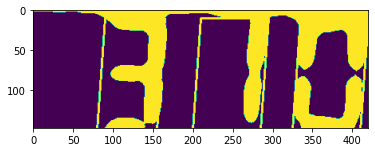

In [231]:
import numpy
import cv2

contours = [numpy.array([[80,150],[155,150],[165,10], [90,10]], dtype=numpy.int32),numpy.array([[200,150],[285,150],[295,10], [210,10]], dtype=numpy.int32) ,numpy.array([[325,150],[410,150],[420,10], [335,10]], dtype=numpy.int32)]

drawing = thresh_with_grey.copy()
for cnt in contours:
    cv2.drawContours(drawing,[cnt],0,(255,255,0),2)

plt.imshow(drawing)
digitCnts=contours
thresh=thresh_with_grey

In [232]:
# sort the contours from left-to-right, then initialize the
# actual digits themselves
# digitCnts = contours.sort_contours(digitCnts,
# 	method="left-to-right")[0]
digits = []

In [233]:
len(digitCnts)

3

In [234]:
# loop over each of the digits
for c in digitCnts:
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    roi = thresh[y:y + h, x:x + w]
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (roiH, roiW) = roi.shape
    (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
    dHC = int(roiH * 0.05)
    # define the set of 7 segments
    segments = [
        ((0, 0), (w, dH)),	# top
        ((0, 0), (dW, h // 2)),	# top-left
        ((w - dW, 0), (w, h // 2)),	# top-right
        ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
        ((0, h // 2), (dW, h)),	# bottom-left
        ((w - dW, h // 2), (w, h)),	# bottom-right
        ((0, h - dH), (w, h))	# bottom
    ]
    on = [0] * len(segments)
    # loop over the segments
    for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        # extract the segment ROI, count the total number of
        # thresholded pixels in the segment, and then compute
        # the area of the segment
        segROI = roi[yA:yB, xA:xB]
        total = cv2.countNonZero(segROI)
        area = (xB - xA) * (yB - yA)
        # if the total number of non-zero pixels is greater than
        # 50% of the area, mark the segment as "on"
        if total / float(area) > 0.5:
            on[i]= 1
    # lookup the digit and draw it on the image
    try:
        digit = DIGITS_LOOKUP[tuple(on)]
        digits.append(digit)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(output, str(digit), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
        print(digit)
    except:
        print(on)
        print('No digit found')

[1, 0, 1, 1, 0, 1, 0]
No digit found
[0, 0, 1, 0, 0, 0, 0]
No digit found
[1, 1, 1, 0, 1, 0, 1]
No digit found


In [100]:
segments

[((0, 0), (96, 22)),
 ((0, 0), (23, 75)),
 ((73, 0), (96, 75)),
 ((0, 68), (96, 82)),
 ((0, 75), (23, 151)),
 ((73, 75), (96, 151)),
 ((0, 129), (96, 151))]

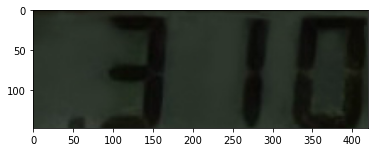

In [101]:
plt.imshow(output)

In [16]:
# display the digits
print(digits)
print(u"{}{}.{} \u00b0C".format(*digits))

[3, 4, 5]
34.5 °C
